### My aim in this task is to improve my model accuracy within the titanic problem on kaggle
`We need to predict correctly if titanic passengers survived or died based on the given attributes`

In [1]:
# getting the important libraries
import os, pandas as pd, numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, seaborn as sns

### Load the data

In [2]:
df = pd.read_csv('datasets/titanicd/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Some preliminary investigation and visualizaton for gaining insights from our dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe() # let's investigate our numerical attributes describtive statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
# only ~38.38% of the passengers in our data could survive based on the mean of our survived attribute
df.describe()['Survived'] # 342 passengers only could survive out of 891, 549 passengers died

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [22]:
(38.38/100)*891, 891-342

(341.9658, 549)

### 342 passengers out of 891 could survive

In [20]:
df[df.Survived==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


### 549 passengers died

In [25]:
df[df.Survived==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


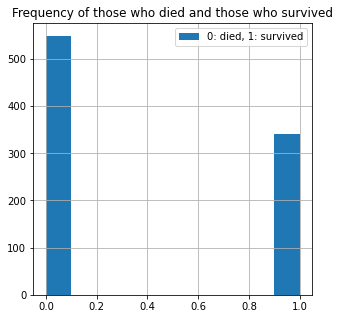

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [138]:
df.Survived.hist(figsize=(5, 5), label='0: died, 1: survived')
plt.title('Frequency of those who died and those who survived')
plt.legend()
plt.show()
df.Survived.value_counts()/df.shape[0]*100 # percent of who survived and died

### 233 females survived out of 342 passengers who survived

In [34]:
df[(df.Survived==1)&(df.Sex=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [35]:
233/342, (342-233)/342

(0.6812865497076024, 0.31871345029239767)

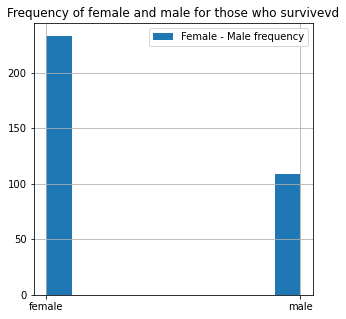

female    233
male      109
Name: Sex, dtype: int64

In [78]:
df[df.Survived==1].Sex.hist(figsize=(5, 5), label='Female - Male frequency')
plt.title('Frequency of female and male for those who survivevd')
plt.legend()
plt.grid(b=True)
plt.show()
df[df.Survived==1].Sex.value_counts()

In [41]:
df[(df.Survived==0)&(df.Sex=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [42]:
81/549, (549-81)/549 

(0.14754098360655737, 0.8524590163934426)

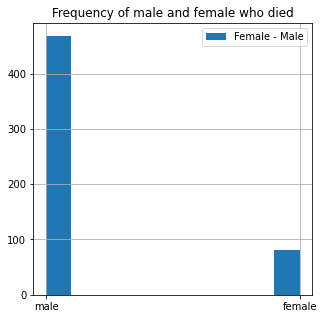

male      468
female     81
Name: Sex, dtype: int64

In [72]:
df[df.Survived==0].Sex.hist(figsize=(5, 5), label='Female - Male')
plt.title('Frequency of male and female who died')
plt.legend()
plt.grid(b=True)
plt.show()
df[df.Survived==0].Sex.value_counts()

### ~14.75% of those who died were females and, ~85.24% were males

### In general, here we introduce the frequency of each sex on board

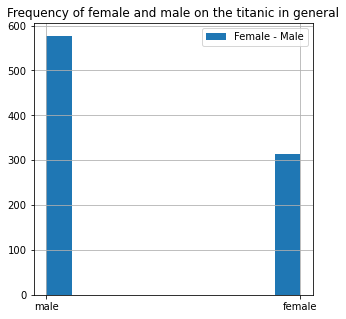

male      577
female    314
Name: Sex, dtype: int64

In [74]:
df.Sex.hist(figsize=(5, 5), label='Female - Male')
plt.title('Frequency of female and male on the titanic in general')
plt.legend()
plt.grid(b=True)
plt.show()
df.Sex.value_counts()

In [80]:
233+81, 109+468, 314+577

(314, 577, 891)

In [95]:
print('percent of whole male, who survived: %.2f'%(109/577*100)+'%', 'but, percent of whole female, who survived: %.2f'%(233/314*100)+'%')

percent of whole male, who survived: 18.89% but, percent of whole female, who survived: 74.20%


### We want to know the 18.89% of the whole males who survived, were of which ages:  `young men`

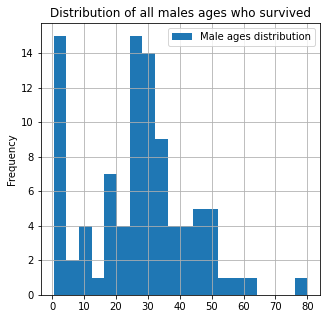

Float64Index([32.0, 27.0,  3.0, 25.0, 36.0, 42.0, 29.0, 31.0, 48.0, 20.0, 35.0,
              26.0,  1.0, 49.0, 34.0, 19.0,  4.0, 45.0, 0.83,  9.0, 28.0, 18.0,
              24.0, 40.0, 16.0, 38.0, 12.0, 23.0, 37.0, 0.67, 30.0, 62.0, 51.0,
              11.0,  6.0, 50.0, 56.0, 80.0, 60.0, 22.0,  2.0, 17.0, 0.92,  8.0,
              52.0, 44.0, 39.0, 0.42, 21.0],
             dtype='float64')

In [119]:
df[(df.Survived==1)&(df.Sex=='male')].Age.plot(kind='hist', figsize=(5, 5), bins=20, label='Male ages distribution')
plt.title('Distribution of all males ages who survived')
plt.grid()
plt.legend()
plt.show()
df[(df.Survived==1)&(df.Sex=='male')].Age.value_counts().index

### We want to know the 81.11%% of the whole males who died, were of which ages:  `young men`

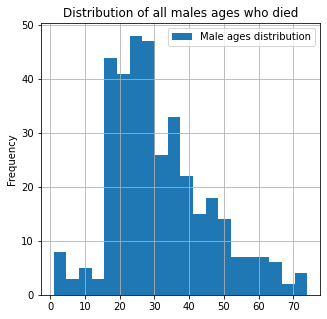

Float64Index([28.0, 21.0, 19.0, 22.0, 25.0, 24.0, 30.0, 18.0, 36.0, 16.0, 29.0,
              26.0, 20.0, 34.0, 33.0, 23.0, 32.0, 39.0, 31.0, 42.0, 35.0, 47.0,
              17.0, 40.0, 27.0, 44.0, 51.0, 38.0, 54.0, 37.0, 45.0, 50.0, 65.0,
              46.0,  4.0, 61.0,  2.0, 52.0, 43.0, 40.5, 64.0, 41.0, 60.0, 14.0,
              70.0, 49.0, 58.0, 48.0, 71.0, 59.0,  1.0, 62.0, 45.5,  9.0,  7.0,
              56.0, 28.5, 11.0, 66.0, 74.0, 70.5, 32.5, 34.5, 55.5, 20.5, 23.5,
              15.0, 55.0, 57.0, 24.5,  8.0, 30.5, 10.0, 36.5],
             dtype='float64')

In [118]:
df[(df.Survived==0)&(df.Sex=='male')].Age.plot(kind='hist', figsize=(5, 5), bins=20, label='Male ages distribution')
plt.title('Distribution of all males ages who died')
plt.grid()
plt.legend()
plt.show()
df[(df.Survived==0)&(df.Sex=='male')].Age.value_counts().index

In [113]:
df[(df.Survived==0)&(df.Sex=='male')&(df.Age.notna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


### Let's investigate the linear correlation between the numerical attributes and the target attribute

In [126]:
corr_mat = df.describe().corr()

Survived       1.000000
Pclass         0.999997
Parch          0.999983
SibSp          0.999971
Age            0.995506
Fare           0.854290
PassengerId    0.521032
Name: Survived, dtype: float64

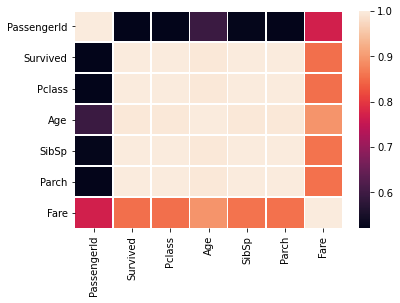

In [142]:
# let's visualize the correlations between attributes
sns.heatmap(corr_mat, linewidths=0.5)
corr_mat['Survived'].sort_values(ascending=False)

From the heatmap above, we concluded that: the `survived` attribute is positively correlated with all numerical attributes <br> except the `PassengerId` atttribute that has a weak correlation

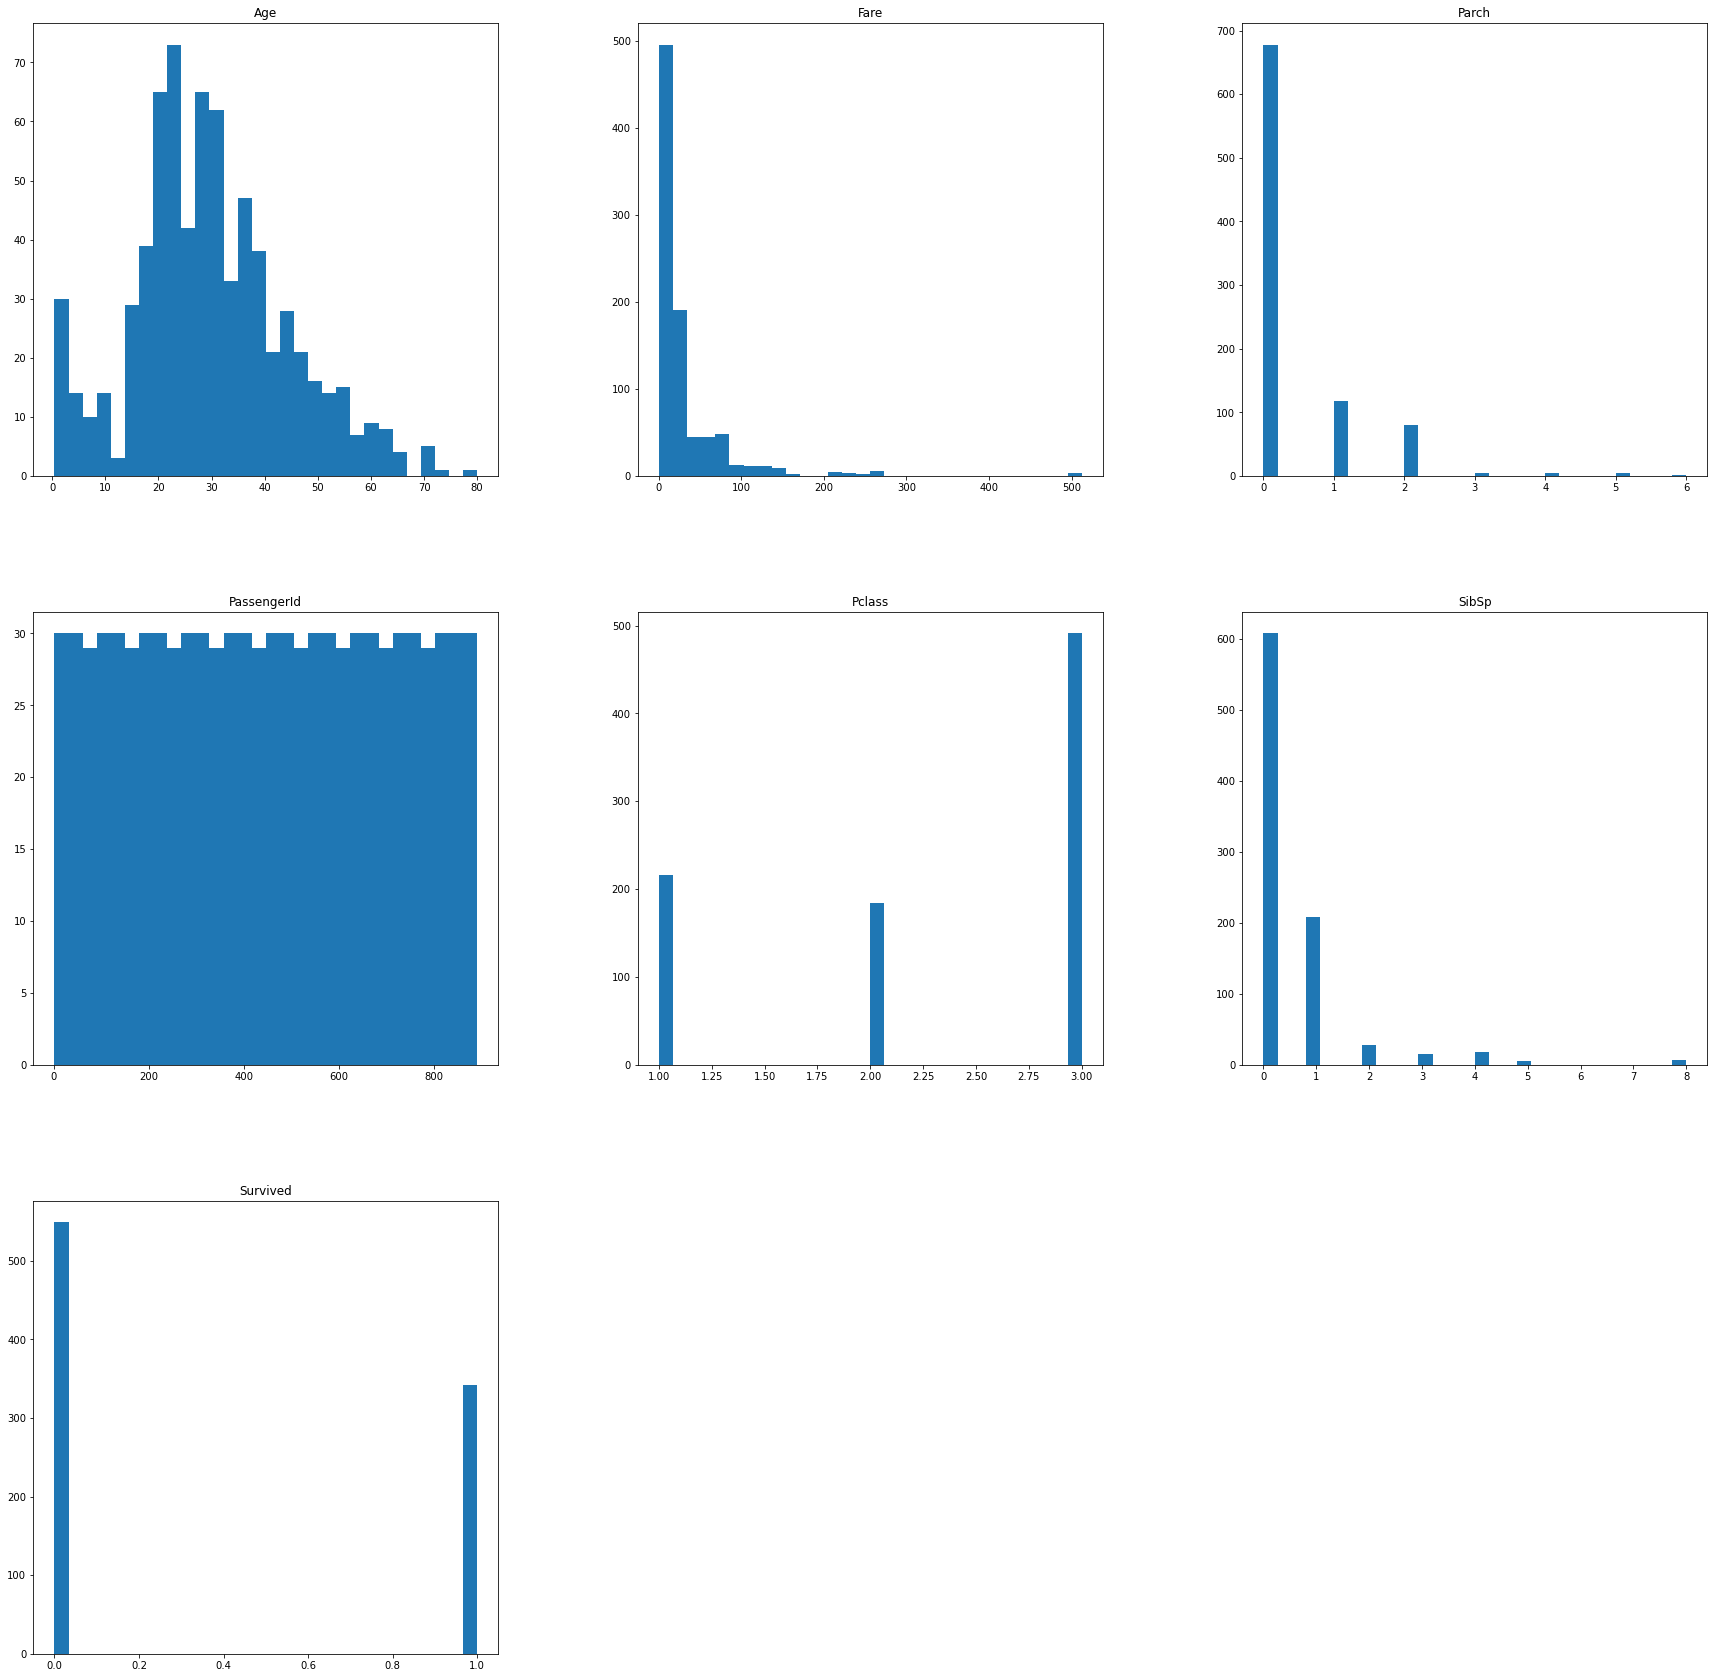

In [140]:
### let's investigate the numerical attributes histograms distributions
df[list(df.describe())].hist(bins=30, figsize=(30, 30), grid=False)
plt.show()

### Let's try to do some feature engineering on the given numerical attributes for better correlation with the survived attribute

In [273]:
df_ = df.copy()

In [208]:
# let's summarize the age attribute values
df_['AgeBucket'] = df_.Age//(15)*15 # integer division
df_[['AgeBucket', 'Survived', 'Age']].groupby(['AgeBucket']).mean()

,Survived,Age
AgeBucket,,
0.0,0.576923,5.816282
15.0,0.362745,22.576797
30.0,0.423256,35.660465
45.0,0.404494,50.376404
60.0,0.240000,64.500000
75.0,1.000000,80.000000


In [201]:
df_.AgeBucket.value_counts()

15.0    306
30.0    215
45.0     89
0.0      78
60.0     25
75.0      1
Name: AgeBucket, dtype: int64

In [170]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [151]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [209]:
df_['FamilySize'] = df.SibSp+df.Parch
df_['FamilySizeBucket'] = df_.FamilySize//2*(2)
df_[['FamilySizeBucket', 'Survived', 'FamilySize']].groupby(['FamilySizeBucket']).mean()

,Survived,FamilySize
FamilySizeBucket,,
0,0.361032,0.230659
2,0.610687,2.221374
4,0.162162,4.594595
6,0.222222,6.333333
10,0.000000,10.000000


In [210]:
df_.FamilySize.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

### Because each level/category in both attributes (`Age`, `FamilySize`) has a different contribution and impact on the `Survived` attribute so that, we should add their categorical versions in the training process `instead` to help our model learn better this pattern

In [211]:
x = np.arange(0, 100).reshape(10, 10)

In [214]:
x[0, :] = np.arange(100, 110).reshape(1, 10)

In [215]:
x

array([[100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
       [ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49],
       [ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69],
       [ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89],
       [ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99]])

In [224]:
df_[df_.FamilySize==0].Survived.describe()['mean'] # those were single on the titanic journey who could survive only 30.35%

0.30353817504655495

### Let's prepare our final preprocessing steps

In [225]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               714 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          889 non-null    object 
 12  AgeBucket         714 non-null    float64
 13  FamilySize        891 non-null    int64  
 14  FamilySizeBucket  891 non-null    int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 104.5+ KB


In [341]:
df_.drop(['Name', 'Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [342]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [343]:
# fill missing values in the Age attribute
from sklearn.impute import SimpleImputer

In [344]:
impute_ = SimpleImputer(strategy='median')
Age_ = impute_.fit_transform(df_.Age.values.reshape(-1, 1))

In [345]:
Age_[Age_!=np.nan] # Done! imputing

array([22.  , 38.  , 26.  , 35.  , 35.  , 28.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 28.  ,
       31.  , 28.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 28.  ,
       19.  , 28.  , 28.  , 40.  , 28.  , 28.  , 66.  , 28.  , 42.  ,
       28.  , 21.  , 18.  , 14.  , 40.  , 27.  , 28.  ,  3.  , 19.  ,
       28.  , 28.  , 28.  , 28.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 28.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 28.  , 28.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 28.  , 28.  ,  0.83, 30.  , 22.  ,
       29.  , 28.  , 28.  , 17.  , 33.  , 16.  , 28.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 28.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 28.  , 21.  , 33.  , 37.  , 28.  , 21.  , 28.  ,
       38.  , 28.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 28.  , 32.5 , 32.5 , 54.  , 12.  ,
       28.  , 24.  ,

In [346]:
Age_ = Age_.reshape(df_.shape[0],) # converted into 1d
df_.Age = Age_

In [347]:
# let's calculate our AgeBucket again after filling all missing values in the Age attribute
df_['AgeBucket'] = df_.Age//15*(15)

In [348]:
# let's try to fill the missing values in the `Embarked` with the mode value which is the most repeated attribute
mode_val = df_.Embarked.value_counts().index[0]
indices = df_[df_.Embarked.isna()].index
for i in indices:
    df_.Embarked.iloc[i] = mode_val

C:\Users\kaban\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [349]:
df_.iloc[indices]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBucket
61,1,1,female,38.0,0,0,80.0,S,30.0
829,1,1,female,62.0,0,0,80.0,S,60.0


In [350]:
df_[df_.Embarked.isna()] # Done!

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBucket


In [351]:
# let's calculate our FamilySizeBucket
df_['FamilySize'] = df_.SibSp+df_.Parch
df_['FamilySizeBucket'] = df_.FamilySize//2*(2)

In [352]:
df_.info() # Done! inserted again to our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Sex               891 non-null    object 
 3   Age               891 non-null    float64
 4   SibSp             891 non-null    int64  
 5   Parch             891 non-null    int64  
 6   Fare              891 non-null    float64
 7   Embarked          891 non-null    object 
 8   AgeBucket         891 non-null    float64
 9   FamilySize        891 non-null    int64  
 10  FamilySizeBucket  891 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


In [287]:
df_.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBucket,FamilySize,FamilySizeBucket
0,0,3,male,22.0,1,0,7.2500,S,15.0,1,0
1,1,1,female,38.0,1,0,71.2833,C,30.0,1,0
2,1,3,female,26.0,0,0,7.9250,S,15.0,0,0
3,1,1,female,35.0,1,0,53.1000,S,30.0,1,0
4,0,3,male,35.0,0,0,8.0500,S,30.0,0,0


In [354]:
df_cleaned = df_.copy()

In [364]:
df_ = df_cleaned.copy()

In [365]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
num_attr = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
cat_attr = ['Pclass', 'Sex', 'Embarked', 'AgeBucket', 'FamilySizeBucket']

col_trans = ColumnTransformer([
    ('simple_impute_num', SimpleImputer(strategy='median'), num_attr),
    ('one_hot_encode_cat', OneHotEncoder(), cat_attr)
])

In [366]:
X_train = df_.drop(['Survived'], axis=1)
y_train = df_.Survived.copy()

In [357]:
y_train = y_train.values

In [367]:
X_train = col_trans.fit_transform(X_train)

In [369]:
X_train[0]

array([22.  ,  1.  ,  0.  ,  7.25,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
        1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ])

### Now., We are ready to train our machine learning models

In [370]:
from sklearn.linear_model import SGDClassifier

model_SGD = SGDClassifier()

In [371]:
model_SGD.fit(X_train, y_train)

SGDClassifier()

In [372]:
# let's evaluate our model performance on training dataset
train_SGD_pred = model_SGD.predict(X_train)

In [373]:
train_SGD_pred[:10]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [374]:
y_train[:10]

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [375]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_train, train_SGD_pred)
score*100

76.99214365881033

In [378]:
# let's train our model in multiple training rounds
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(model_SGD, X_train, y_train, cv=10, scoring='accuracy')
cross_score.mean()

0.7497877652933833

In [379]:
# let's try another model: random forest classifier
from sklearn.tree import DecisionTreeClassifier

model_DTC = DecisionTreeClassifier()

In [380]:
model_DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [381]:
# let's see it's performance on training dataset
train_DTC_pred = model_DTC.predict(X_train)
train_DTC_pred[-10:]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [382]:
y_train[-10:] # there may be an overfitting

881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [383]:
accuracy_score(y_train, train_DTC_pred) # accuracy of 97.97% on training dataset so there may be an overfitting

0.9797979797979798

In [386]:
cross_score_DTC = cross_val_score(model_DTC, X_train, y_train, cv=10, scoring='accuracy')
cross_score_DTC.mean() # over multiple rounds of training we got an accuracy of 79.014%

0.7924219725343321

In [387]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier()

In [388]:
model_RFC.fit(X_train, y_train)

RandomForestClassifier()

In [389]:
train_RFC_pred = model_RFC.predict(X_train)

In [390]:
train_RFC_pred[-10:]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [391]:
y_train[-10:]

881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [394]:
cross_score_RFC = cross_val_score(model_RFC, X_train, y_train, cv=10, scoring='accuracy')
cross_score_RFC.mean() # Great Job! we could reach an accuracy of 80.47% this time with the RandomForestClassifier

0.804769038701623

In [395]:
import joblib
model_RFC_past = joblib.load('model_RFC_final.pkl')

In [398]:
cross_score_RFC = cross_val_score(model_RFC_past, X_train, y_train, cv=10, scoring='accuracy')
cross_score_RFC.mean() # Great Job! we could reach an accuracy of 80.59% this time with the RandomForestClassifier

0.8059176029962547

Let's try to evaluate our model on the testing dataset

In [399]:
df_test = pd.read_csv('datasets/titanicd/test.csv')

In [400]:
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


### Let's prepare our test data for the final evaluation

In [401]:
df_test.drop(['Name', 'Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [403]:
Age_test_filled = impute_.fit_transform(df_test.Age.values.reshape(-1, 1))

In [404]:
df_test.Age = Age_test_filled

In [409]:
median_val = df_test.Fare.describe()['50%']
median_val

14.4542

In [410]:
df_test[df_test.Fare.isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [411]:
df_test.Fare.iloc[152] = median_val

C:\Users\kaban\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [414]:
# let's calculate our AgeBucket again after filling all missing values in the Age attribute
df_test['AgeBucket'] = df_test.Age//15*(15)

In [431]:
# let's calculate our FamilySizeBucket
df_test['FamilySize'] = df_test.SibSp+df_.Parch
df_test['FamilySizeBucket'] = df_test.FamilySize//3*(3)

In [432]:
df_test.info() # Done! Transformations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            418 non-null    int64  
 1   Sex               418 non-null    object 
 2   Age               418 non-null    float64
 3   SibSp             418 non-null    int64  
 4   Parch             418 non-null    int64  
 5   Fare              418 non-null    float64
 6   Embarked          418 non-null    object 
 7   AgeBucket         418 non-null    float64
 8   FamilySize        418 non-null    float64
 9   FamilySizeBucket  418 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 32.8+ KB


In [418]:
df_cleaned_test = df_test.copy()

In [434]:
X_test = col_trans.fit_transform(df_test)

In [435]:
df_.iloc[0]

Survived               0
Pclass                 3
Sex                 male
Age                   22
SibSp                  1
Parch                  0
Fare                7.25
Embarked               S
AgeBucket             15
FamilySize             1
FamilySizeBucket       0
Name: 0, dtype: object

In [422]:
df_cleaned_test.iloc[0]

Pclass                   3
Sex                   male
Age                   34.5
SibSp                    0
Parch                    0
Fare                7.8292
Embarked                 Q
AgeBucket               30
FamilySize               0
FamilySizeBucket         0
Name: 0, dtype: object

In [436]:
X_test[0]

array([34.5   ,  0.    ,  0.    ,  7.8292,  0.    ,  0.    ,  0.    ,
        1.    ,  0.    ,  1.    ,  0.    ,  1.    ,  0.    ,  0.    ,
        0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,
        0.    ,  0.    ,  0.    ])

In [425]:
X_train.shape, X_test.shape

((891, 24), (418, 25))

In [437]:
df_test.AgeBucket.value_counts().sort_index()

0.0      31
15.0    240
30.0     86
45.0     47
60.0     13
75.0      1
Name: AgeBucket, dtype: int64

In [438]:
df_test.FamilySizeBucket.value_counts().sort_index()

0.0     392
3.0      20
6.0       4
9.0       1
12.0      1
Name: FamilySizeBucket, dtype: int64

In [439]:
df_.FamilySizeBucket.value_counts().sort_index()

0     698
2     131
4      37
6      18
10      7
Name: FamilySizeBucket, dtype: int64

In [440]:
pred_final = model_RFC.predict(X_test)

In [443]:
test = pd.read_csv('datasets/titanicd/test.csv')

In [444]:
final_output = np.c_[test.PassengerId, pred_final]

In [448]:
pd.DataFrame(final_output, columns=['PassengerId', 'Survived']).to_csv('my_submission_final_2_kareem_emad.csv', index=False)